## 🏗️ **Concrete Compressive Strength Prediction Project**

### **1.** **Import packages and Data**

In [1]:
#import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#supress warnings
import warnings
warnings.filterwarnings("ignore")

### **2.** **Initial EDA and Distributions**

#### **A. Dataset Introduction**

This dataset contains:
- **1,030 samples** of concrete formulations
- **8 input features** (mix components + age)
- **1 target variable**: Compressive strength (MPa)

#### **B. Data Loading**
We'll fetch the dataset directly from UCI using `ucimlrepo`:

Key steps:
1. Fetch dataset by ID
2. Separate features (X) and target (y)
3. Examine metadata and variable descriptions

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# Convert metadata if it's a flat dictionary
metadata = concrete_compressive_strength.metadata

# If metadata is a dataclass or similar, try converting to dict first
if not isinstance(metadata, dict):
    metadata = metadata.__dict__

# Flatten and convert to DataFrame
metadata_df = pd.DataFrame(list(metadata.items()), columns=['Attribute', 'Value'])
print("Metadata as DataFrame:")
print(metadata_df)

# Convert variables to DataFrame directly (usually a list of dicts)
variables_df = pd.DataFrame(concrete_compressive_strength.variables)
print("\nVariables as DataFrame:")
print(variables_df)


Metadata as DataFrame:
                   Attribute  \
0                     uci_id   
1                       name   
2             repository_url   
3                   data_url   
4                   abstract   
5                       area   
6                      tasks   
7            characteristics   
8              num_instances   
9               num_features   
10             feature_types   
11              demographics   
12                target_col   
13                 index_col   
14        has_missing_values   
15     missing_values_symbol   
16  year_of_dataset_creation   
17              last_updated   
18               dataset_doi   
19                  creators   
20               intro_paper   
21           additional_info   

                                                Value  
0                                                 165  
1                       Concrete Compressive Strength  
2   https://archive.ics.uci.edu/dataset/165/concre...  
3   https://arch

In [58]:
metadata_df

Attribute  \
0                     uci_id   
1                       name   
2             repository_url   
3                   data_url   
4                   abstract   
5                       area   
6                      tasks   
7            characteristics   
8              num_instances   
9               num_features   
10             feature_types   
11              demographics   
12                target_col   
13                 index_col   
14        has_missing_values   
15     missing_values_symbol   
16  year_of_dataset_creation   
17              last_updated   
18               dataset_doi   
19                  creators   
20               intro_paper   
21           additional_info   

                                                Value  
0                                                 165  
1                       Concrete Compressive Strength  
2   https://archive.ics.uci.edu/dataset/165/concre...  
3   https://archive.ics.uci.edu/static/public/165/...  
4   Concrete is the most important material in civ...  
5                               Physics and Chemistry  
6                                        [Regression]  
7                                      [Multivariate]  
8                                                1030  
9                                                   8  
10                                             [Real]  
11                                                 []  
12                    [Concrete compressive strength]  
13                                               None  
14                                                 no  
15                                               None  
16                                               1998  
17                                    Sun Feb 11 2024  
18                                    10.24432/C5PK67  
19                                      [I-Cheng Yeh]  
20  {'ID': 383, 'type': 'NATIVE', 'title': 'Modeli...  
21  {'summary': 'Number of instances \t1030\r\nNum...

In [3]:
variables_df

name     role        type demographic description  \
0                         Cement  Feature  Continuous        None        None   
1             Blast Furnace Slag  Feature     Integer        None        None   
2                        Fly Ash  Feature  Continuous        None        None   
3                          Water  Feature  Continuous        None        None   
4               Superplasticizer  Feature  Continuous        None        None   
5               Coarse Aggregate  Feature  Continuous        None        None   
6                 Fine Aggregate  Feature  Continuous        None        None   
7                            Age  Feature     Integer        None        None   
8  Concrete compressive strength   Target  Continuous        None        None   

    units missing_values  
0  kg/m^3             no  
1  kg/m^3             no  
2  kg/m^3             no  
3  kg/m^3             no  
4  kg/m^3             no  
5  kg/m^3             no  
6  kg/m^3             no  
7     day             no  
8     MPa             no

### **C.** **Data Consolidation**

##### **Creating Unified Dataset**
We'll now combine the features (`X`) and target (`y`) into a single DataFrame for comprehensive analysis.

**Purpose**:
- Enables holistic data exploration
- Simplifies feature-target relationship analysis
- Prepares data for visualization

**Structure**:
- **Features (X)**: 8 input variables (cement, water, aggregates, etc.)
- **Target (y)**: `csMPa` (concrete compressive strength in MPa)

*Note: The `axis=1` parameter concatenates horizontally (column-wise)*

In [4]:
# Combine features (X) and targets (y) into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the resulting DataFrame
print(df)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0               1040.0           676.0   28                          79.99  
1    

In [5]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete compressive strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### **D.** **Feature Distribution Analysis**

##### **Exploring Variable Distributions**
We'll visualize the distribution of each feature to:
- Identify potential outliers
- Check for normal/skewed distributions
- Understand value ranges across variables


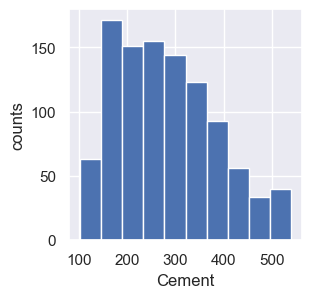

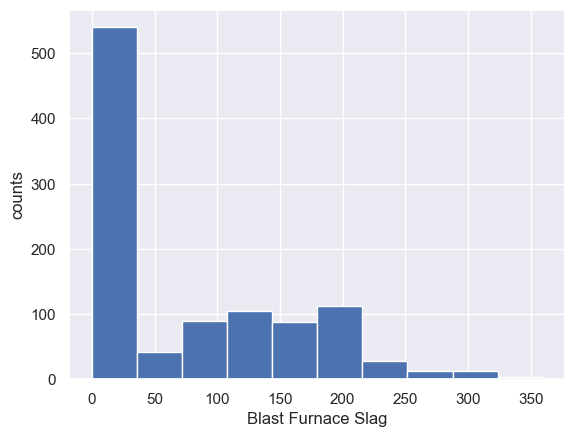

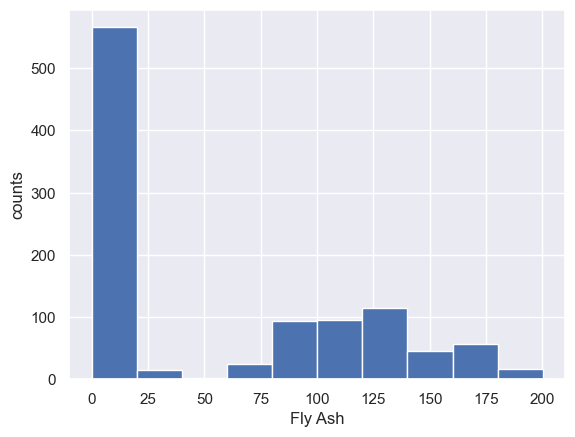

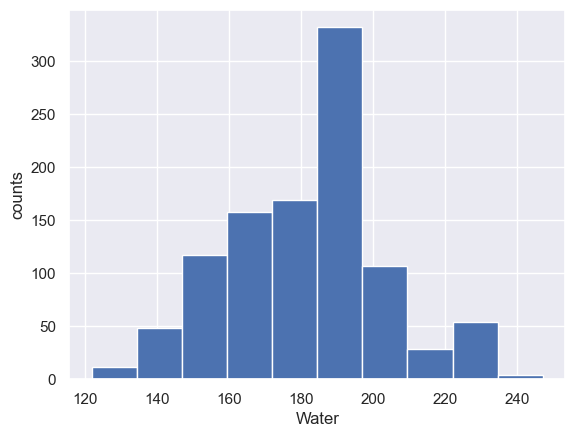

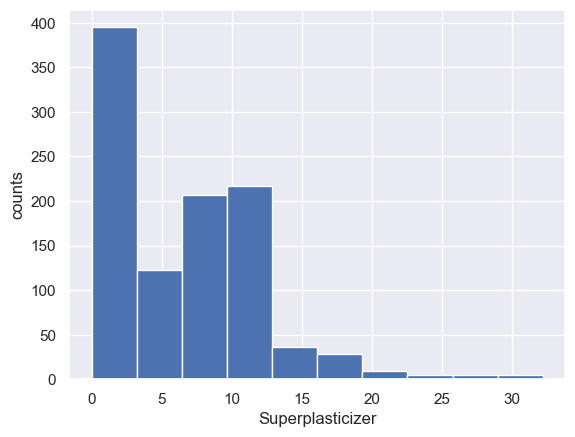

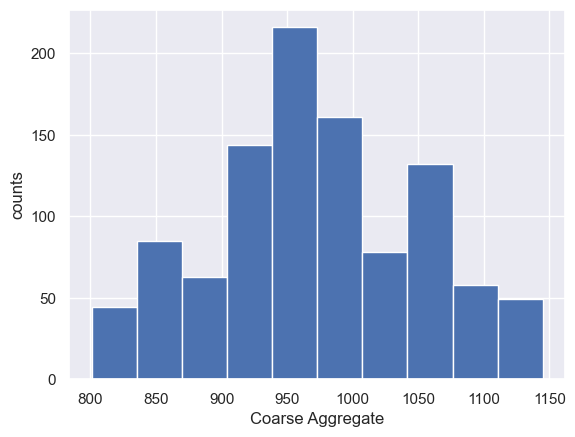

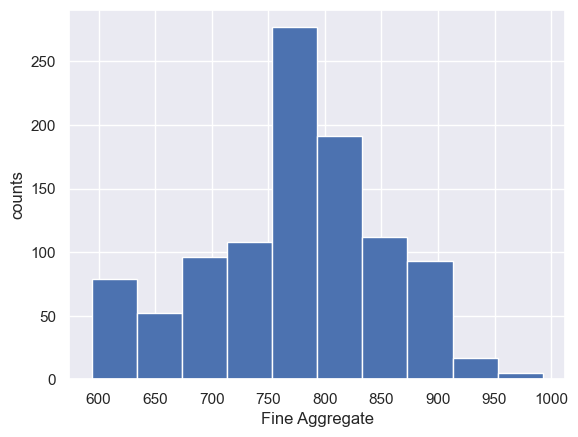

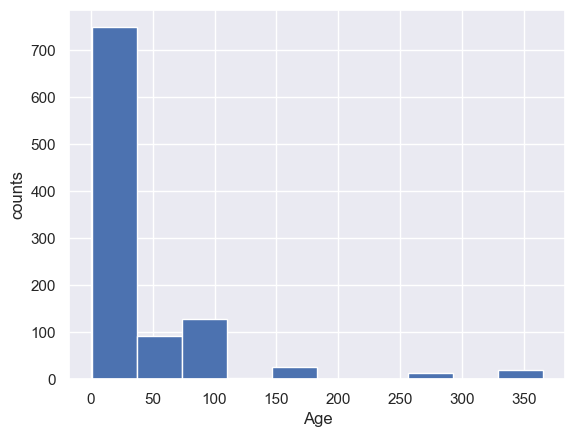

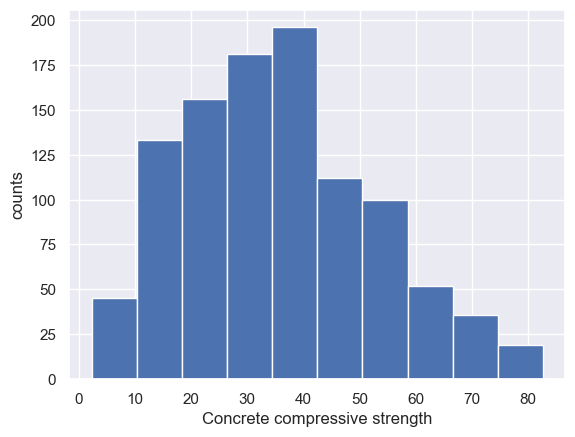

In [7]:
#look at data distribution
plt.figure(figsize=(3, 3))
for i in df.columns:
    plt.hist(df[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()


### **E.** **Feature Correlation Analysis**

##### **Inter-variable Relationships**
We'll examine pairwise correlations between all features using:
- **Pearson correlation coefficient** (linear relationships)
- **Heatmap visualization** for intuitive interpretation

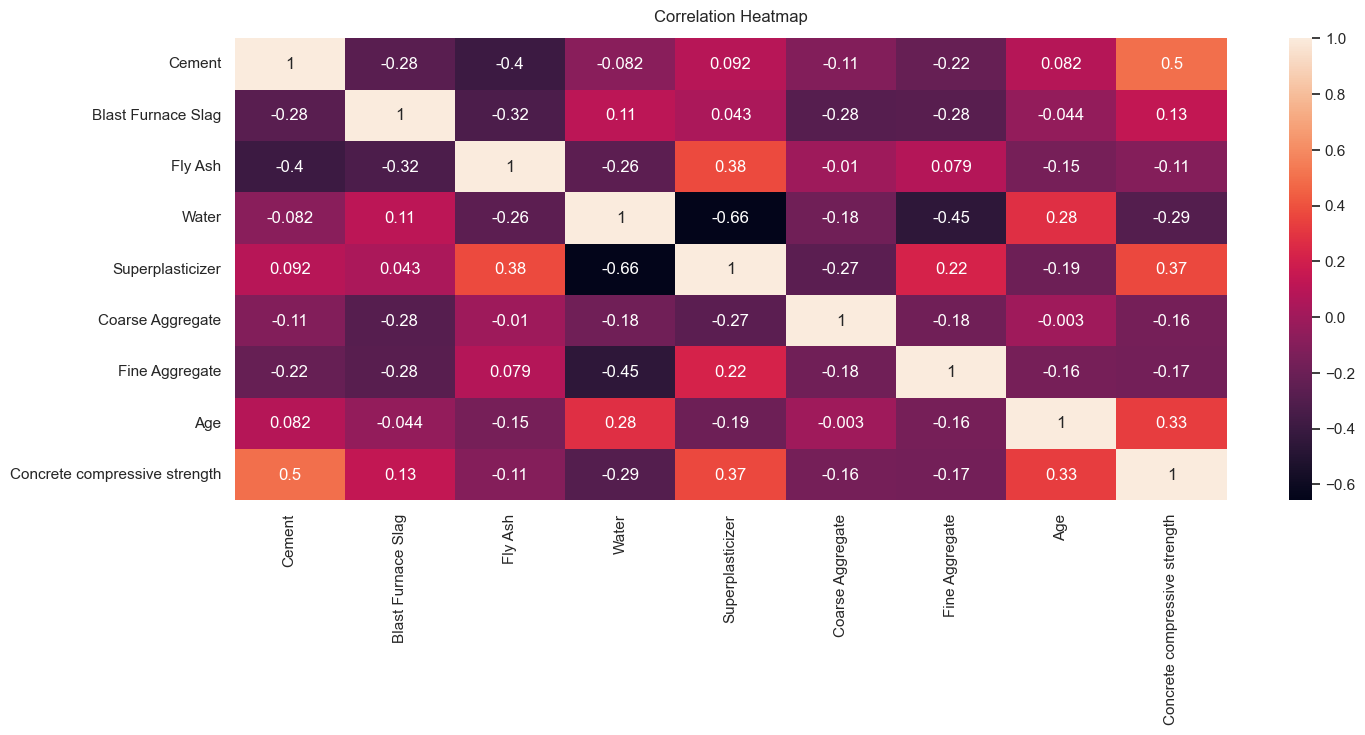

In [8]:
#heat map using Pearson's coefficient
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### **Strength-Based Cohort Analysis**
##### **Segmenting by Compressive Strength**

We'll divide the dataset into quartile-based strength groups to analyze how other features vary across different strength levels.

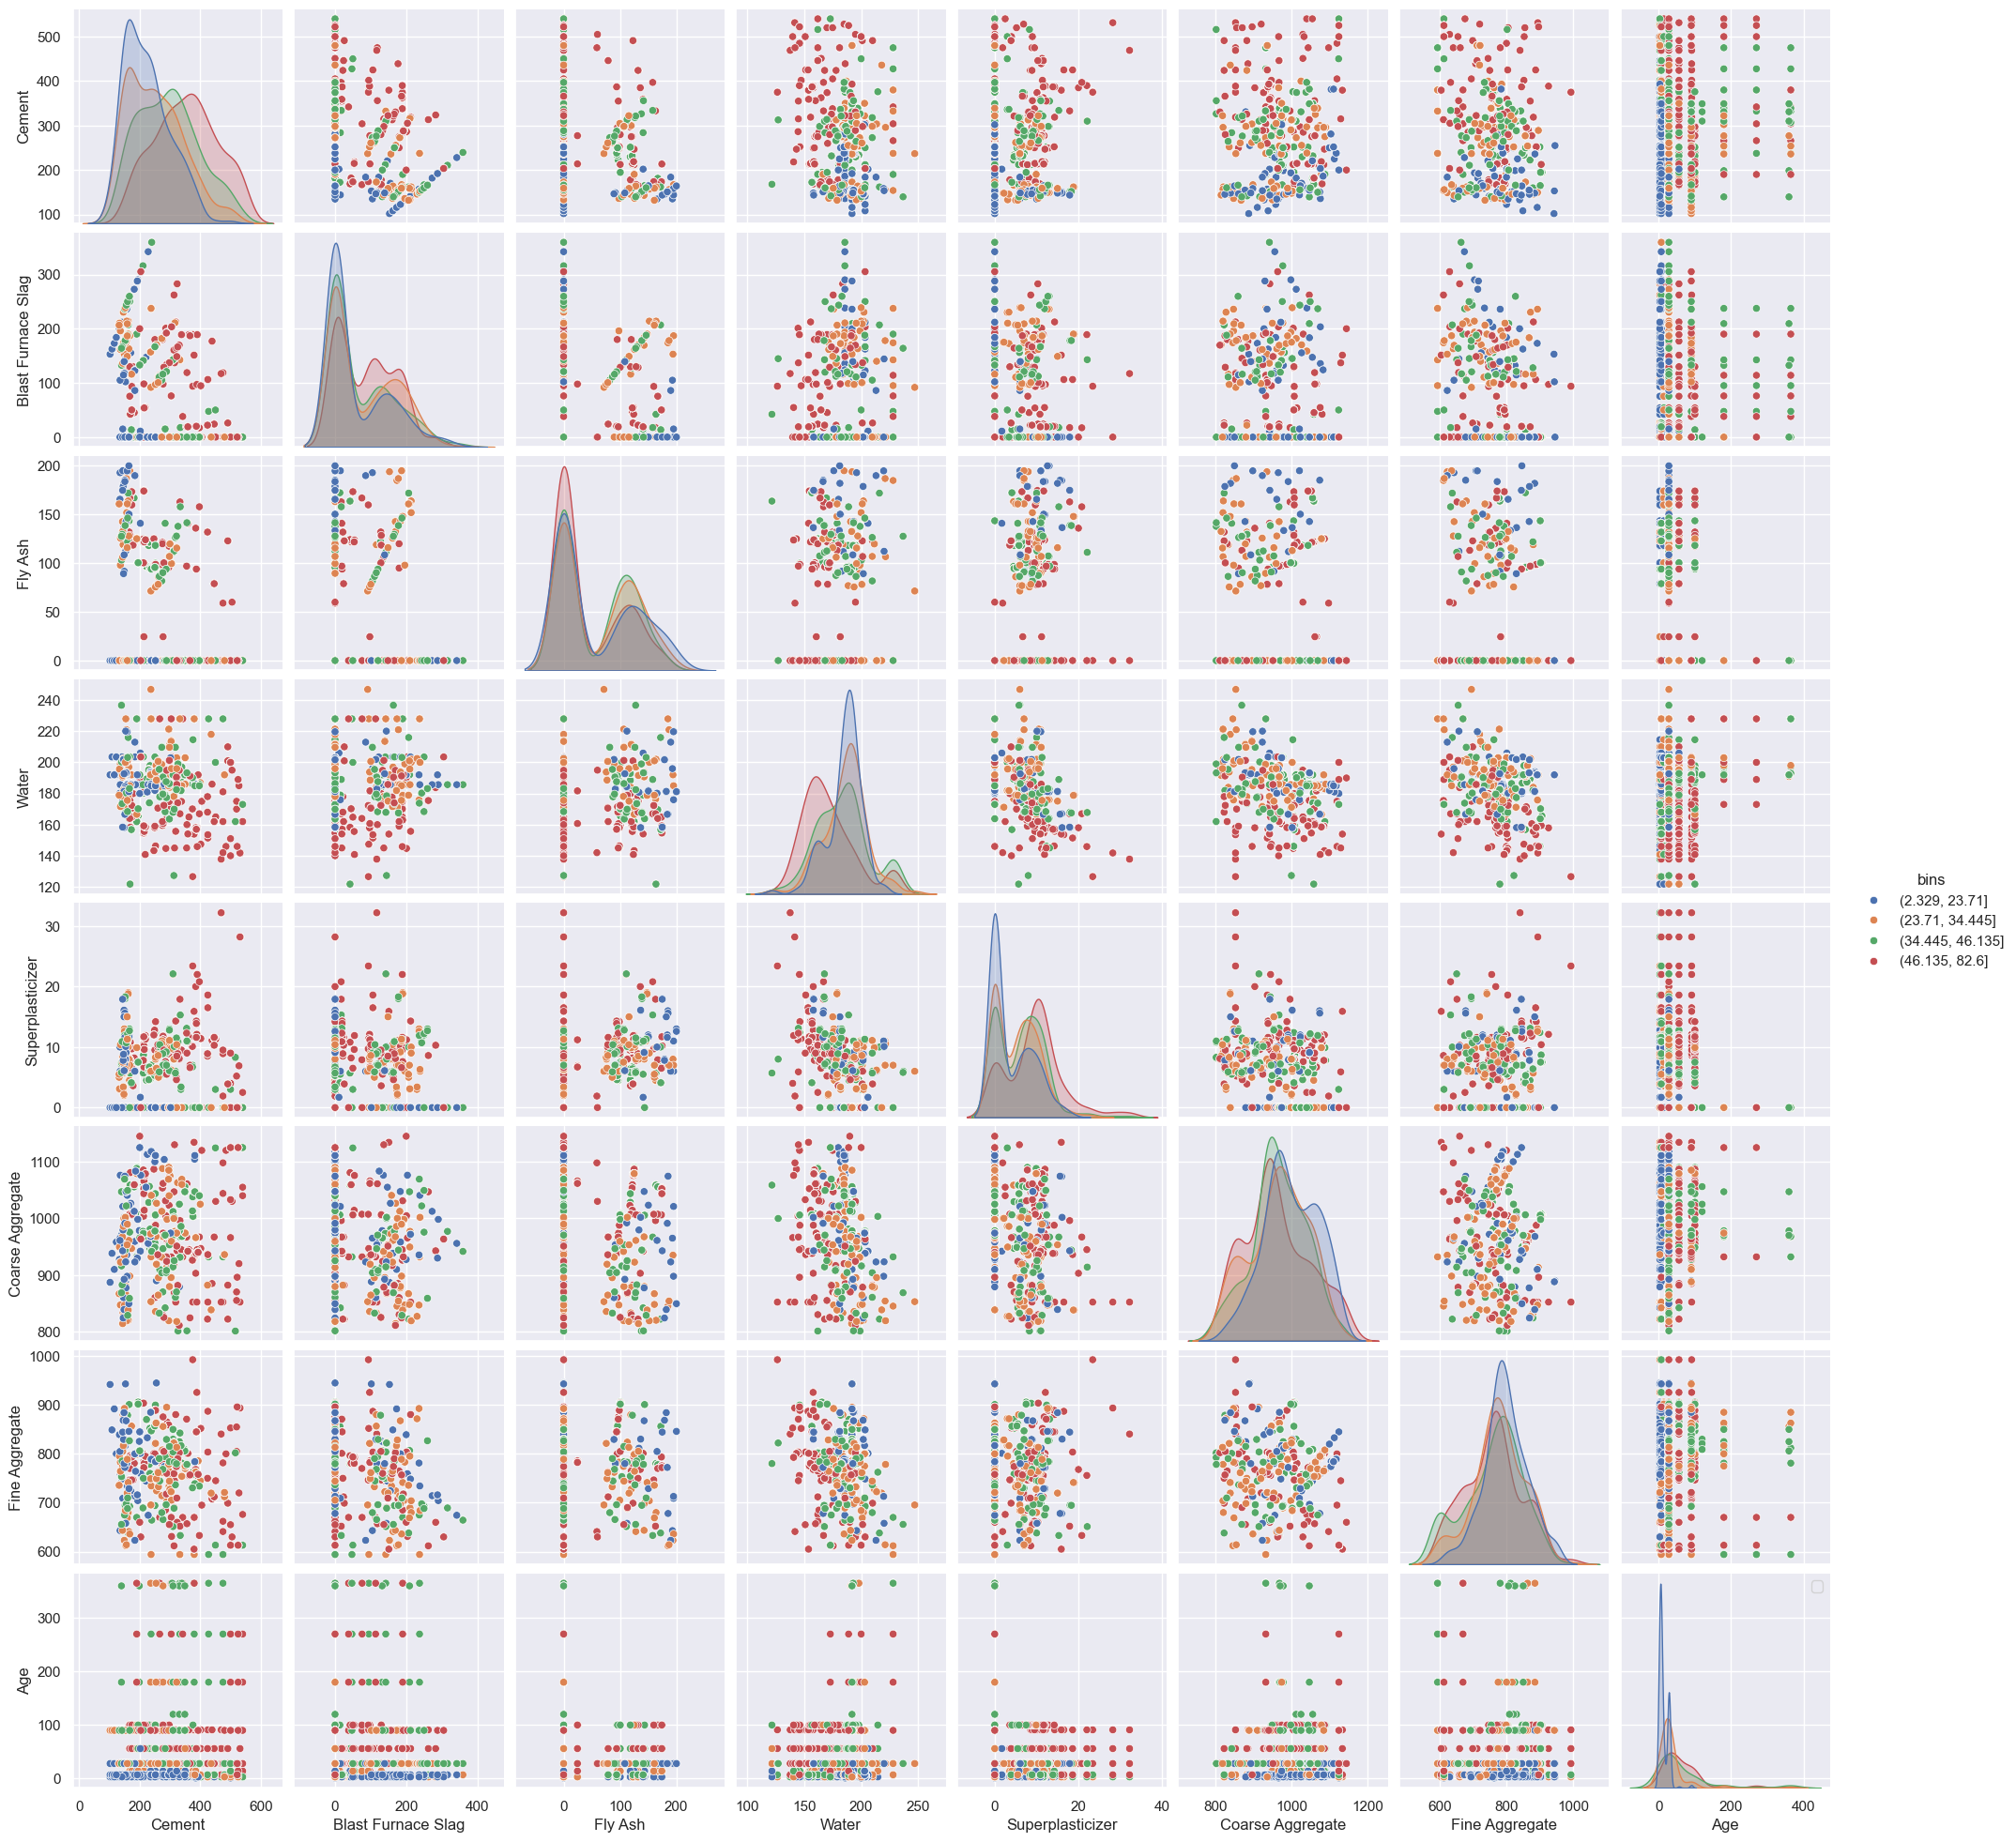

In [9]:
#create bins from compressive strength
bins = pd.qcut(df['Concrete compressive strength'], q=4)

#add bins to concrete df
df['bins']=bins
#look at how target is distributed among variables
sns.pairplot(df.loc[:, (df.columns != 'Concrete compressive strength')], hue='bins')
plt.legend()
plt.show()

In [10]:
# Calculate the correlation between a feature (e.g., 'Cement') and the target ('Concrete compressive strength')
correlation = df['Cement'].corr(df['Concrete compressive strength'])
print(f"Correlation between Cement and Concrete compressive strength: {correlation}")

Correlation between Cement and Concrete compressive strength: 0.4978319193241573


In [11]:
correlation = df['Age'].corr(df['Concrete compressive strength'])
print(f"Correlation between Cement and Concrete compressive strength: {correlation}")

Correlation between Cement and Concrete compressive strength: 0.3288730007799864


### **Focused Feature Analysis: Cement vs. Strength**

#### **Investigating the Dominant Linear Relationship**
We'll examine the strongest pairwise correlation observed in our heatmap by visualizing the relationship between:
- **Independent Variable**: Cement content (kg/m³)
- **Dependent Variable**: Compressive strength (MPa)

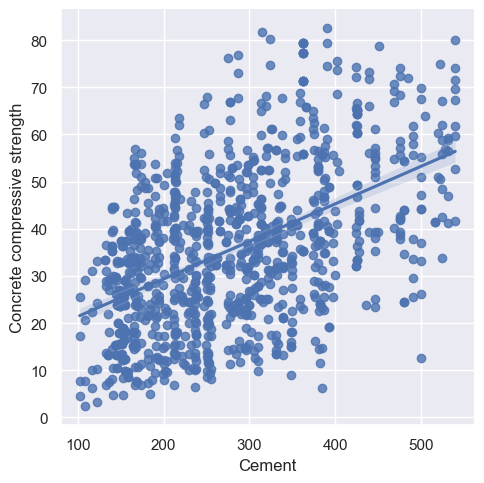

In [13]:
#plot strongest linear correlation
sns.lmplot(x='Cement', y='Concrete compressive strength',data=df, height=5, aspect=1)
plt.show()

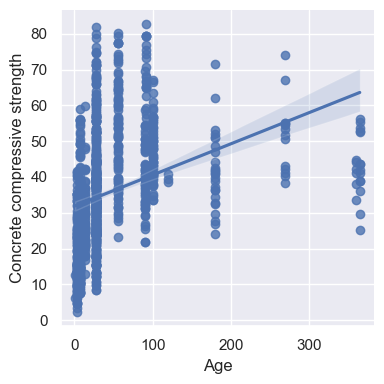

In [14]:
sns.lmplot(x='Age', y='Concrete compressive strength', data=df, height=4, aspect=1)
plt.show()

So we can see that the correlation is 0.5 between Concrete compressive strength and Cement

In [15]:
#drop bins from concrete data
concrete_data = df.drop('bins', axis=1)
#copy of variables and target
X = concrete_data.copy()
y = X.pop('Concrete compressive strength')

### **3.** **Mutual Information Feature Analysis**


We'll quantify non-linear dependencies between features and compressive strength using Mutual Information (MI) scores.

In [ ]:
# here the same as the code above but just adjust the logic issue
assert isinstance(X, pd.DataFrame), "Input must be pandas DataFrame"
assert not X.isnull().any().any(), "Handle missing values first"

import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# STEP 1: Make a copy of the features DataFrame
X_mi = X.copy()  # X is your features DataFrame

# STEP 2: Identify categorical (object or string) columns before encoding
categorical_cols = X_mi.select_dtypes(include="object").columns.tolist()

# STEP 3: Apply label encoding to categorical columns (convert to numbers)
for col in categorical_cols:
    X_mi[col], _ = X_mi[col].factorize()

# STEP 4: Create a list/array indicating which features are discrete (categorical)
# A feature is discrete if it was originally a string/object before encoding
discrete_features = [col in categorical_cols for col in X_mi.columns]

# STEP 5: Define a function to compute mutual information scores
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    return mi_scores.sort_values(ascending=False)

# STEP 6: Use the function to calculate MI scores
mi_scores = make_mi_scores(X_mi, y, discrete_features)

# STEP 7: Display the scores
print(mi_scores)


Age                   0.360652
Water                 0.358796
Cement                0.304379
Coarse Aggregate      0.253338
Fine Aggregate        0.213077
Superplasticizer      0.210074
Blast Furnace Slag    0.180774
Fly Ash               0.123952
Name: MI Scores, dtype: float64


In [18]:
# i tried to nit use the encoder because all features are numeric

import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression

my_trial = X.copy()



categorical_cols = my_trial.columns

discrete_features = [col in categorical_cols for col in my_trial.columns]

# define a function to compute mutual information scores
def make_mi_scores(X, y):
    # Create a SelectKBest object with mutual_info_regression as the score function
    selector = SelectKBest(score_func=mutual_info_regression, k='all')
    
    # Fit the selector to the data
    selector.fit(X, y)
    
    # Get the scores and feature names
    scores = selector.scores_
    feature_names = X.columns
    
    # Create a DataFrame to hold the scores and feature names
    mi_scores = pd.DataFrame({'Feature': feature_names, 'MI Score': scores})
    
    return mi_scores

# STEP 6: Use the function to calculate MI scores
mi_scores = make_mi_scores(my_trial, y)

# STEP 7: Display the scores
print(mi_scores)

              Feature  MI Score
0              Cement  0.307659
1  Blast Furnace Slag  0.182631
2             Fly Ash  0.122279
3               Water  0.359165
4    Superplasticizer  0.211884
5    Coarse Aggregate  0.253992
6      Fine Aggregate  0.210290
7                 Age  0.360658


This tells you that Age is the most informative feature for predicting the target

#### **Top Predictive Features Visualization**

##### **Examining High MI Features**

We'll visualize the relationships for our top 3 most informative features identified by Mutual Information:

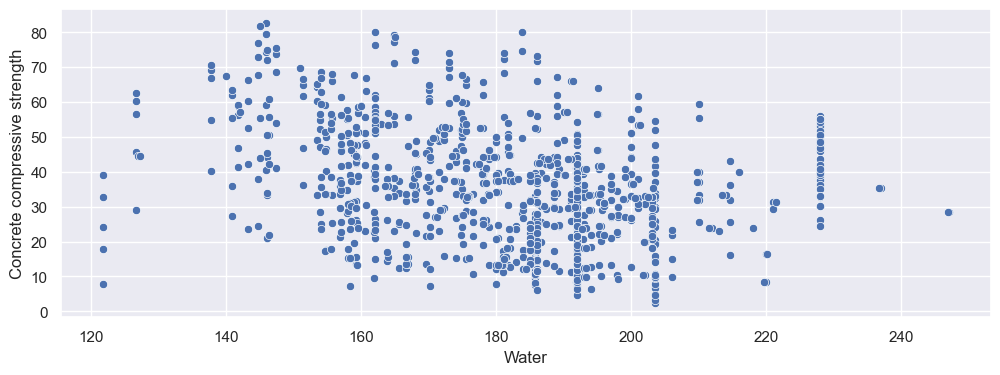

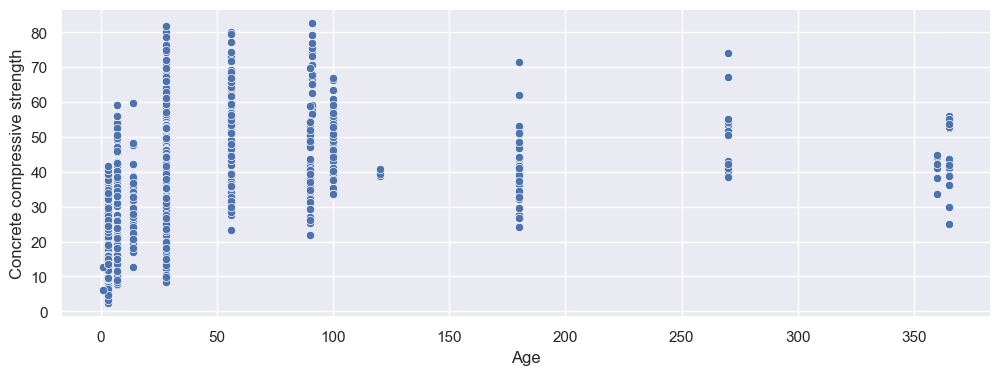

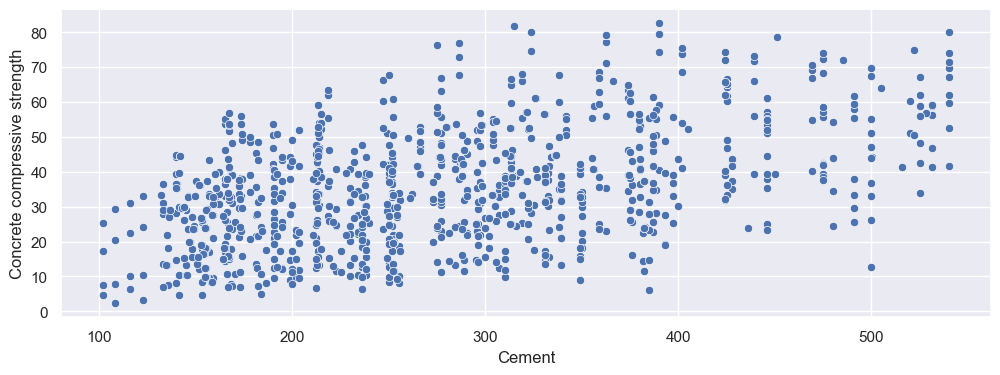

In [20]:
#plot top MI score predictors against target
for i in ['Water', 'Age', 'Cement']:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.scatterplot(x=X_mi[i], y=y, ax=ax)
    plt.show()

### **4.** **Principal Component Analysis**

In [21]:
#copy features matrix for principal component analysis
X_for_PCA = X.copy()

#standardize
X_for_PCA_scaled = (X_for_PCA - X_for_PCA.mean(axis=0)) / X_for_PCA.std(axis=0)

from sklearn.decomposition import PCA

#create principal components
pca = PCA(len(X.columns))
X_pca = pca.fit_transform(X_for_PCA_scaled)

#convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)


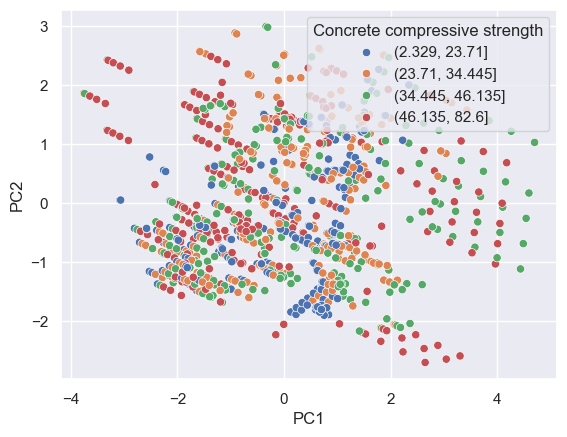

In [22]:
#plot data using principal components
sns.scatterplot(x=X_pca.loc[:,'PC1'],y=X_pca.loc[:,'PC2'], hue=bins)
plt.show()

i got a scatter plot with lots of colored points and a legend that contain * Concrete compressive strength , bleu point : ( 2.329 , 23.71 )
orange point : ( 23.71, 34.445)
green point : (34.445 , 46.135)
red point : ( 46.135, 82.6) 

In [23]:
#determine loadings
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

PC1       PC2       PC3       PC4       PC5  \
Cement              0.098401 -0.113737  0.814202  0.054297 -0.148206   
Blast Furnace Slag  0.177262  0.686053 -0.171794  0.362699  0.020932   
Fly Ash            -0.394662 -0.142948 -0.408221 -0.226751 -0.549631   
Water               0.547004  0.053256 -0.213190 -0.296060 -0.070222   
Superplasticizer   -0.505945  0.282930  0.234597  0.037274 -0.354618   
Coarse Aggregate    0.037928 -0.629943 -0.174088  0.545805  0.033083   
Fine Aggregate     -0.401926 -0.019391 -0.004569 -0.385282  0.701237   
Age                 0.291479 -0.125981  0.100521 -0.527919 -0.228010   

                         PC6       PC7       PC8  
Cement             -0.203142 -0.221844  0.446163  
Blast Furnace Slag  0.304882 -0.228363  0.437384  
Fly Ash            -0.183267 -0.352463  0.381886  
Water              -0.365970  0.524275  0.388741  
Superplasticizer    0.193294  0.664643  0.051750  
Coarse Aggregate    0.314559  0.226840  0.349320  
Fine Aggregate      0.092466  0.039026  0.433370  
Age                 0.743908 -0.069367  0.012881

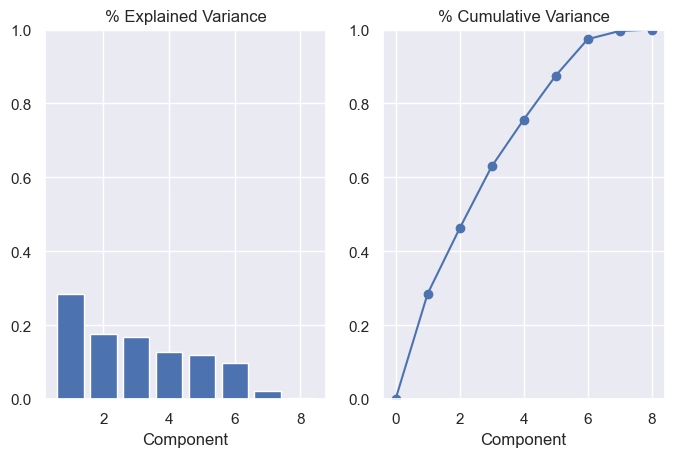

In [24]:
#determine % explained variance and use % cumulative variance for elbow method to determine number of PCs

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

### **5.** **OLS Regression Analysis**

In [25]:
#generate OLS regression results for all features
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
print(model.fit().summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.616
Model:                                       OLS   Adj. R-squared:                  0.613
Method:                            Least Squares   F-statistic:                     204.3
Date:                           Fri, 13 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                   19:51:17   Log-Likelihood:                -3869.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1021   BIC:                             7800.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

**Question 1:** Is there a relationship between the predictors (age and ingredients) and the response variable (compressive strength)?

Null hypothesis: coefficients for each predictor is zero.

F-statistic = 204.3 >> 1 (suggests at least one of the predictors is related to compressive strength)

Prob(F-statistic) = 6.29e-206 << 0.05 (probability that the null hypothesis is true)

Therefore, there is a relationship between the predictors and the response variable.

Question 2: How strong is the relationship?

R-squared = 0.616 (61.6% of variance is explained by the model)

Question 3: Which predictors contribute to compressive strength?

Look at the p-values for each t-statistic for each predictor where p-values are the probability of t-statistic given the null hypothesis is true. A probability less than 1/20 (0.05) is considered sufficient to reject the null hypothesis.

All but coarse and fine aggregates are less than 0.05. Therefore, the aggregates do not contribute to compressive strength in this model.

Question 4: How large is the effect of each predictor on compressive strength?

The only predictor confidence interval to include zero is coarse aggregate. The rest are considered to be statistically significant. To test whether collinearity is the reason why the confidence interval is so wide for coarse aggregate, the VIF scores are calculated.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]
#sort VIF data 
print(vif_data)

              feature        VIF
0              Cement  15.456717
1  Blast Furnace Slag   3.329127
2             Fly Ash   4.147833
3               Water  82.157569
4    Superplasticizer   5.471094
5    Coarse Aggregate  84.955779
6      Fine Aggregate  72.790995
7                 Age   1.699459


The VIF scores exceeding 5 to 10 indicate collinearity (where 1 is the minimum). The aggregates, water, and cement exhibit multicollinearity. Superplasticizer is within the 5 to 10 range, so if being conservative then superplasticizer also demonstrates multicollinearity. Therefore, we cannot say that coarse aggregate is or is not statistically significant, because the wideness of the confidence interval could be due to multicollinearity.

To assess association of each predictor, seperate OLS for each predictor is performed:

In [27]:
#print OLS summary for each feature
for i in X.columns:
    X_sm = sm.add_constant(X[i])
    model = sm.OLS(y,X_sm)
    print(model.fit().summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.248
Model:                                       OLS   Adj. R-squared:                  0.247
Method:                            Least Squares   F-statistic:                     338.7
Date:                           Fri, 13 Jun 2025   Prob (F-statistic):           1.32e-65
Time:                                   19:51:25   Log-Likelihood:                -4214.6
No. Observations:                           1030   AIC:                             8433.
Df Residuals:                               1028   BIC:                             8443.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Looking at the p-value of the t-statistic: all variables have a strong association with compressive strength where fly ash has the weakest by 0.001.

Question 5: How accurately can this model predict compressive strength?

The accuracy depends on what type of prediction:

Individual response (Y = f(X) + ep), the prediction interval is used
Average response (f(X)), the confidence interval is used

Looking at the p-value of the t-statistic: all variables have a strong association with compressive strength where fly ash has the weakest by 0.001.

Question 5: How accurately can this model predict compressive strength?

The accuracy depends on what type of prediction:

Individual response (Y = f(X) + ep), the prediction interval is used
Average response (f(X)), the confidence interval is used
Prediction intervals are wider than confidence intervals because the account for the uncertainity associated with the irreducible error (ep).

Question 6: Is the relationship linear?

Non-linearity can be determined from residual vs. predicted value plot for each variable (top right plots below). When linearity exists, there should be no clear pattern. The residual plot with the most non-linear form is for age where for ages 0 to 20, there are negative residuals then the residuals increase from 20 to 100 before decreasing again. Water and fine aggregate have slight non-linear patterns. Transformations of the predictors (e.g., sqrt(X), X^2) could accomodate the nonlinearities.

In [28]:
print(concrete_data.columns)


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')


In [29]:
concrete_data.columns = concrete_data.columns.str.replace(' ', '_')


### **Ordinary Least Squares (OLS) Regression Diagnostics**

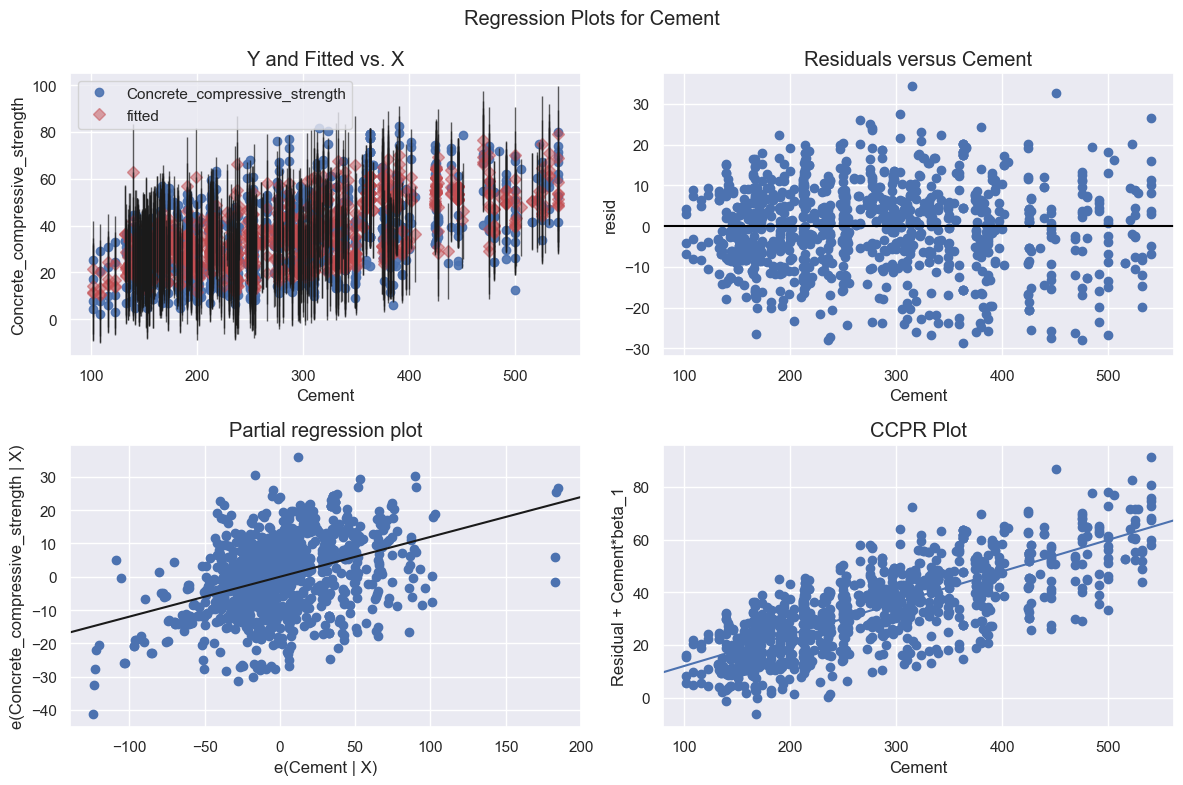

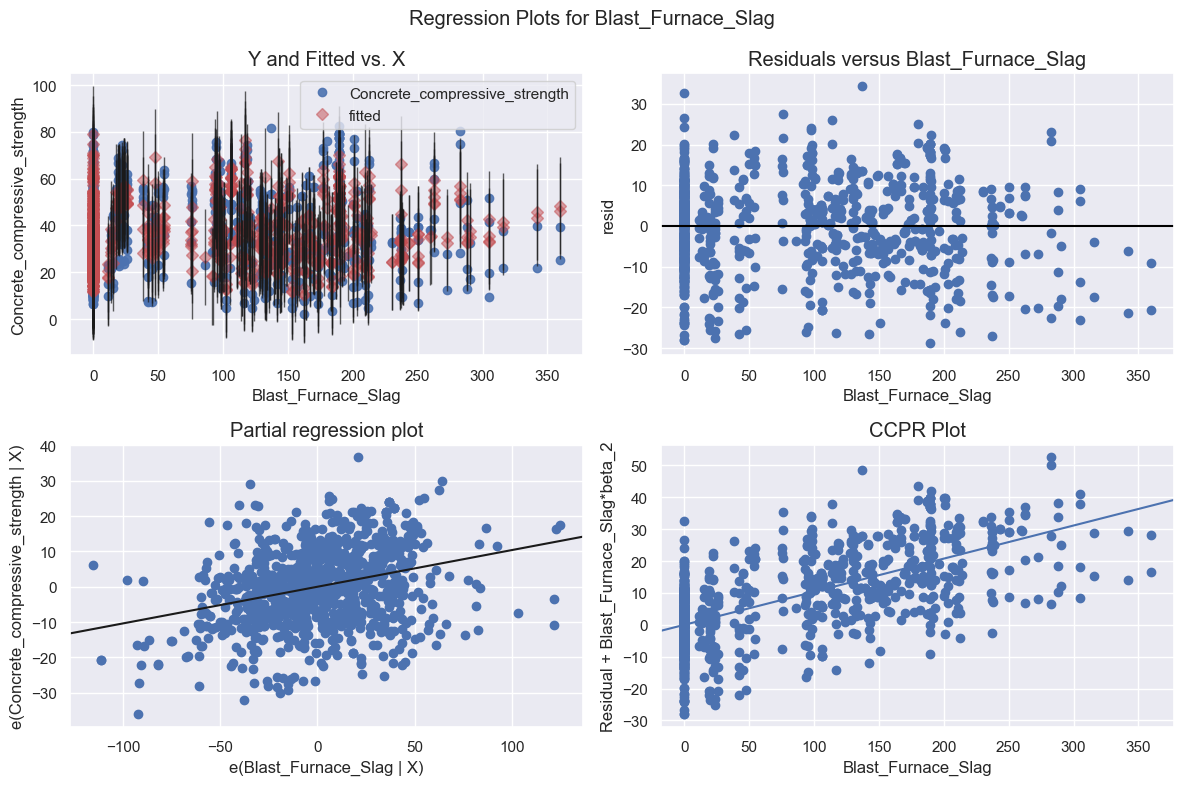

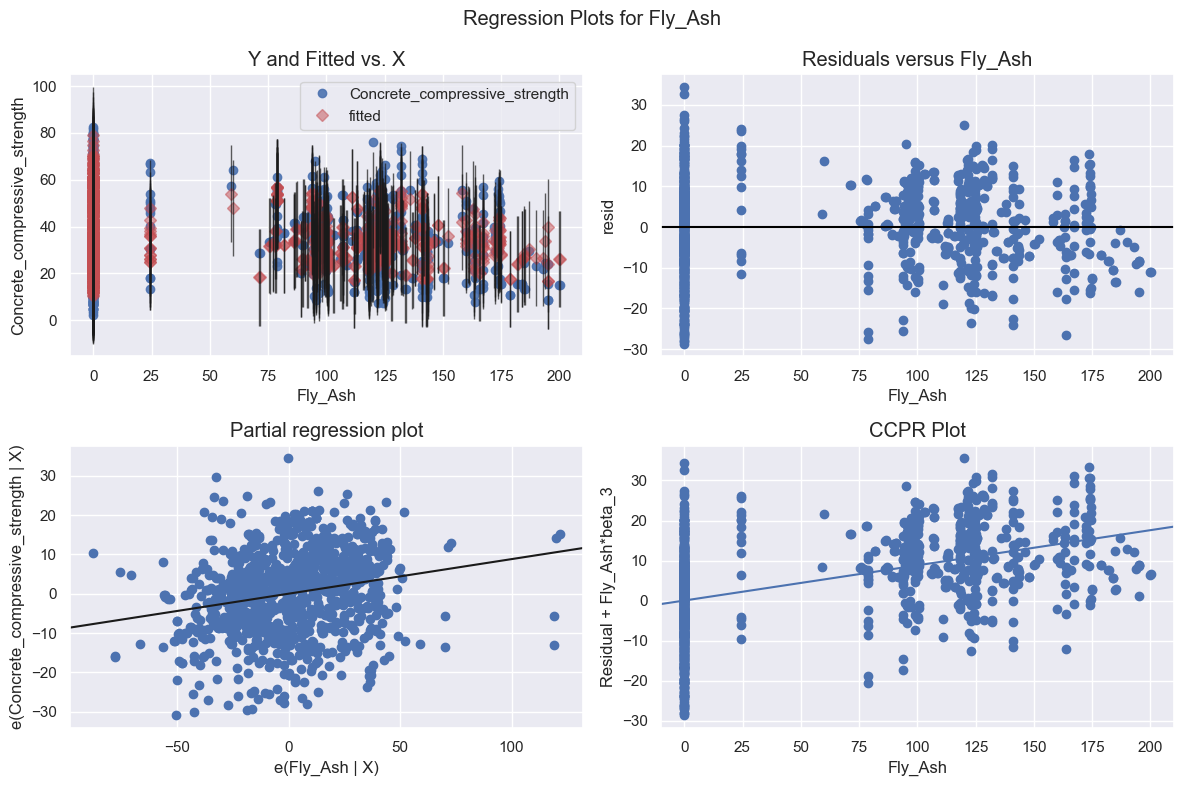

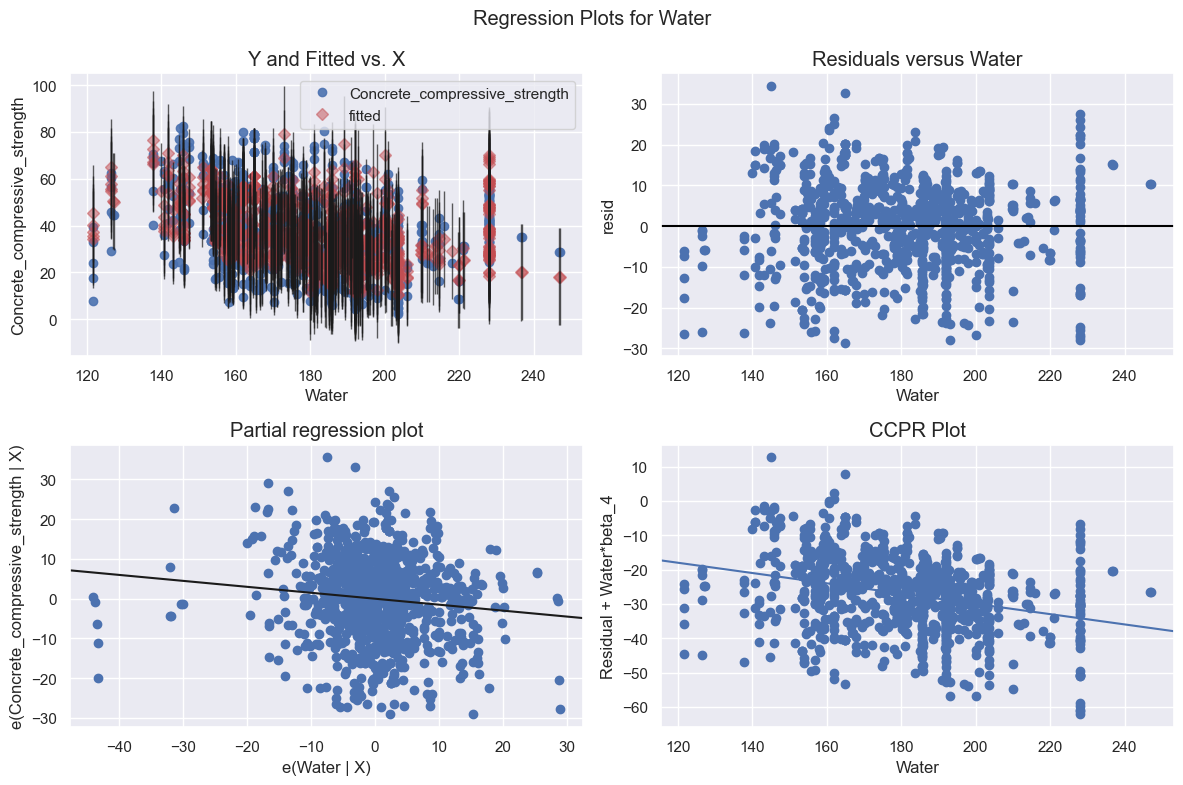

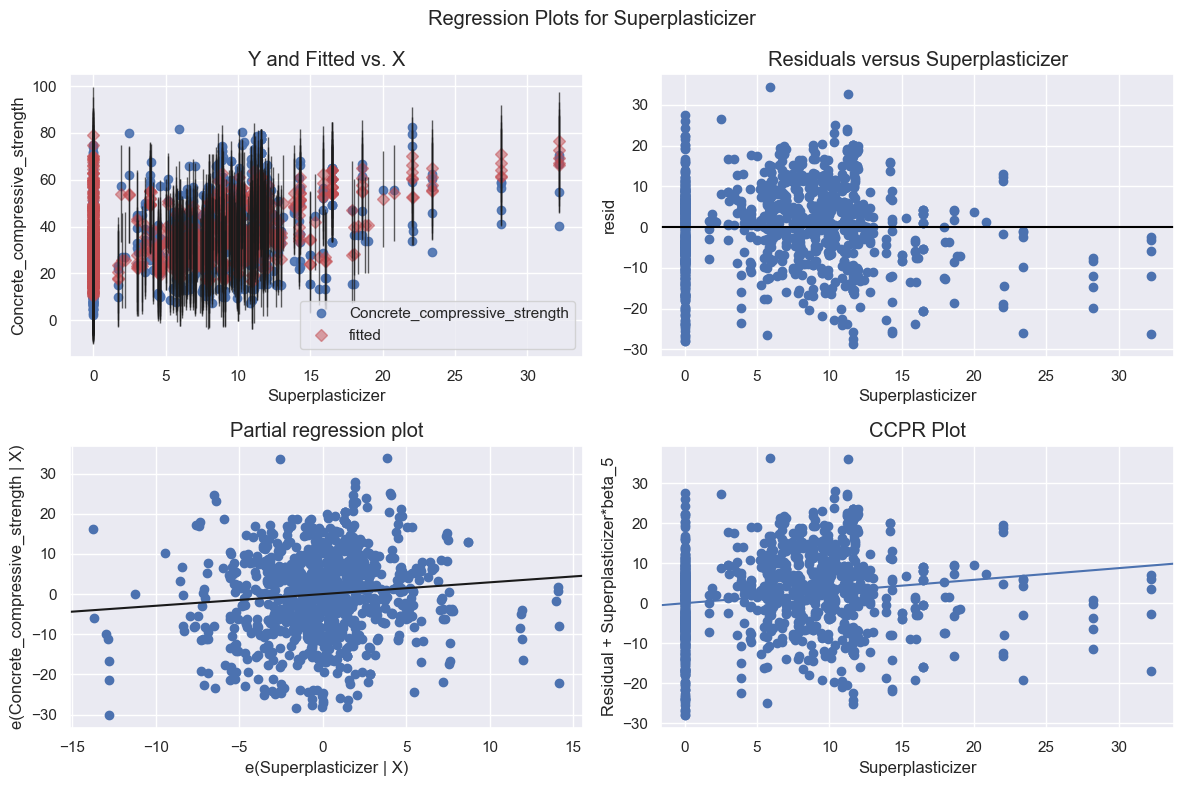

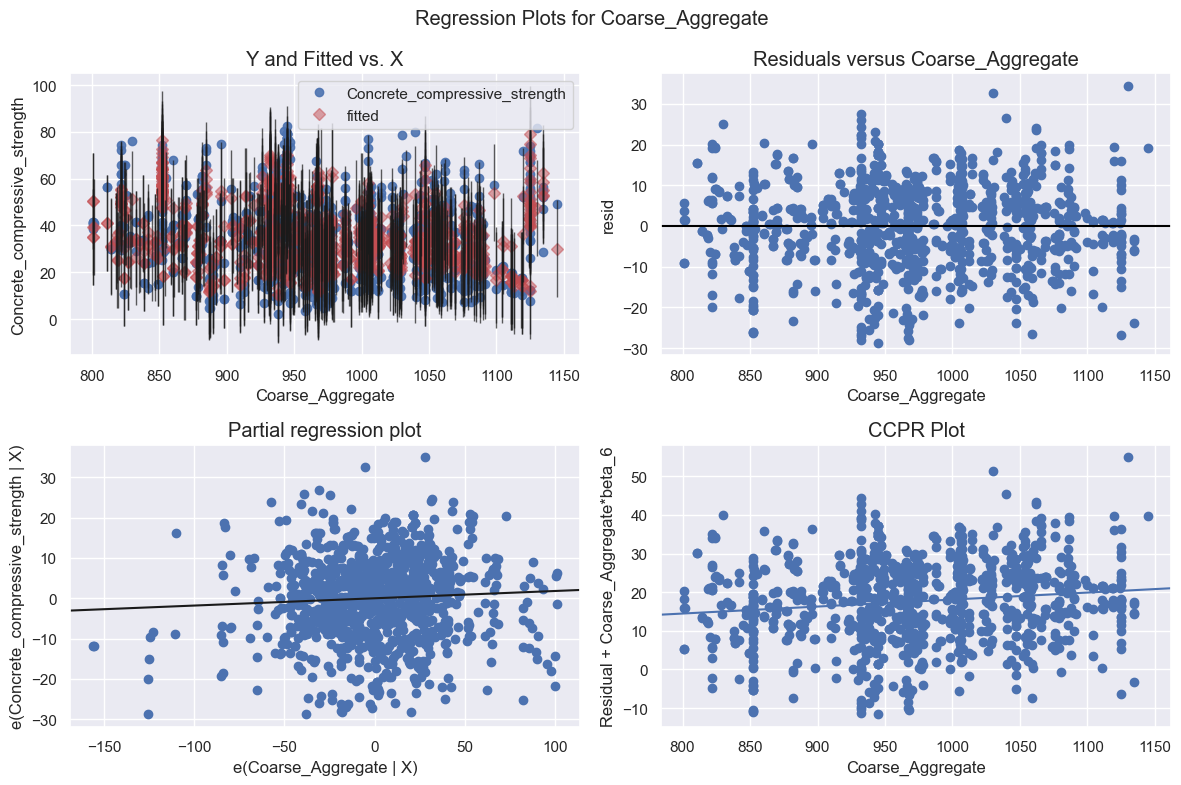

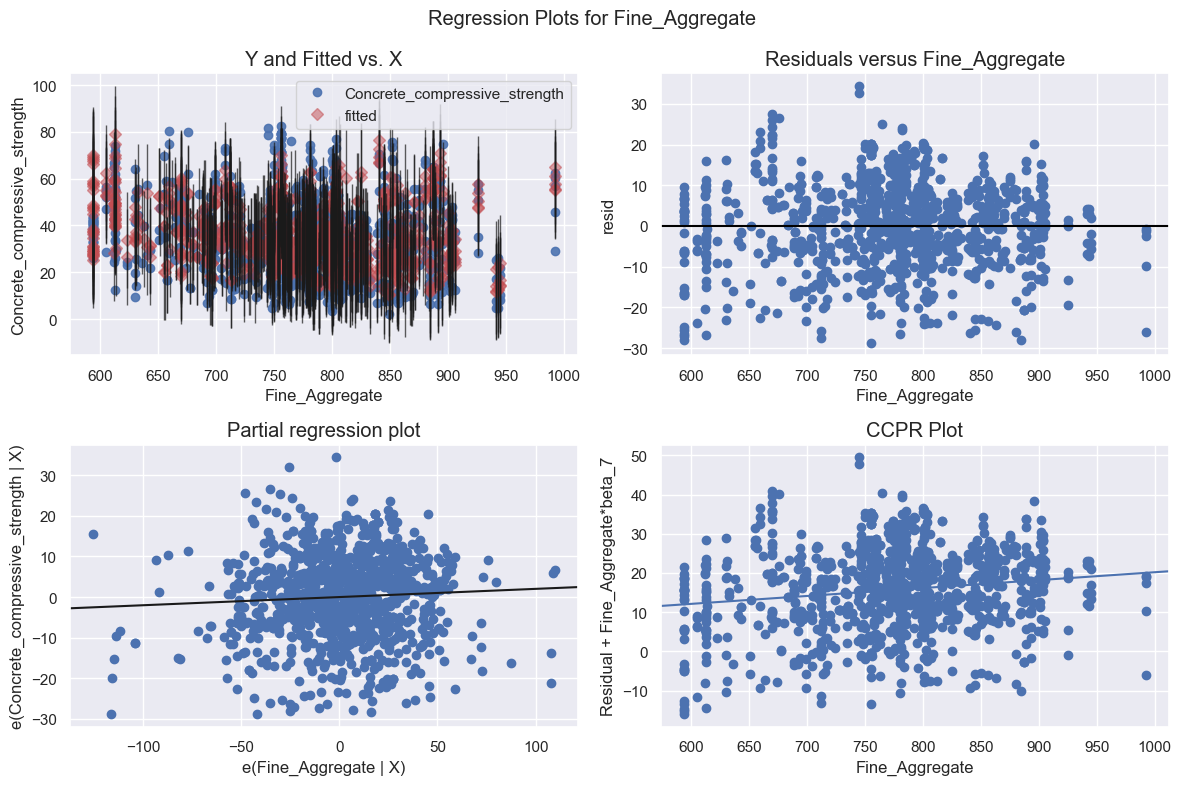

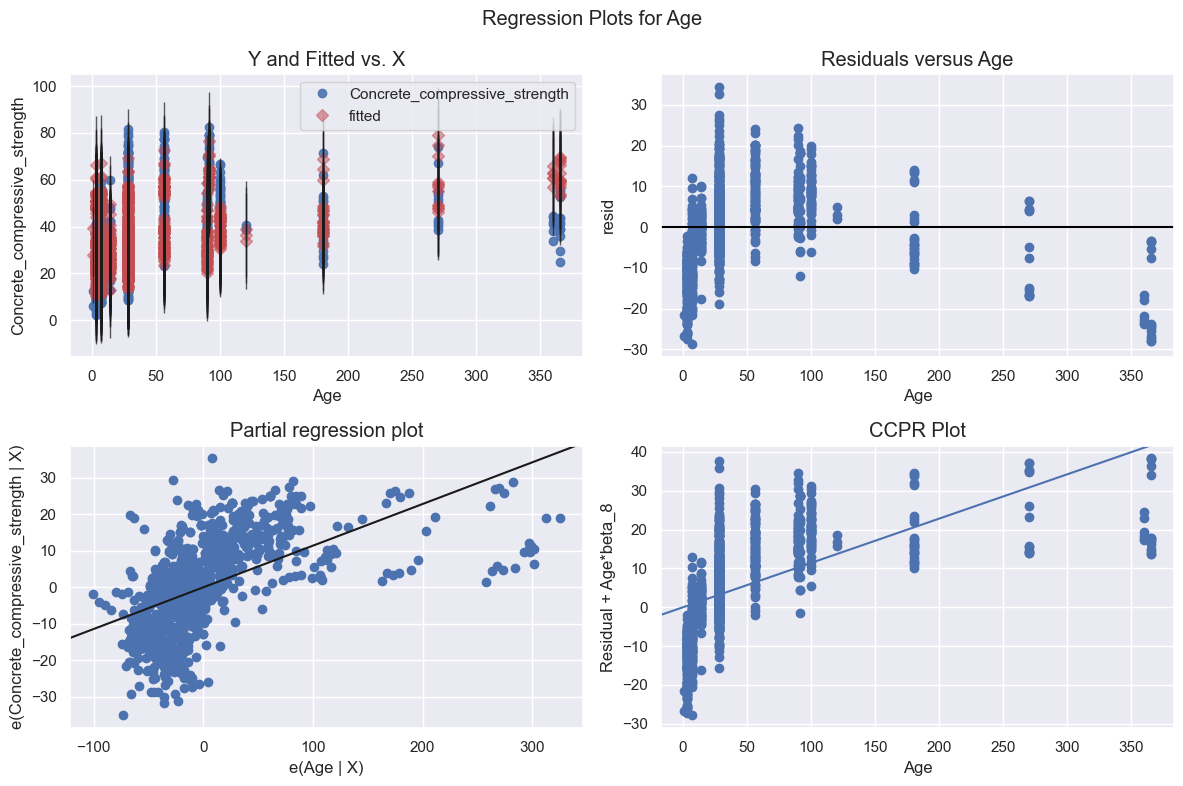

In [30]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
model = ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age',
            data=concrete_data).fit()
predictors = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 
              'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age']

for i in predictors:
    fig = plt.figure(figsize=(12, 8))
    sm.graphics.plot_regress_exog(model, i, fig=fig)
    plt.show()


### **6.** **Feature Engineering with OLS**


Question 7: Is there synergy among the predictors?

To answer this, an interaction term needs to be created that accomodates non-additive relationships and the R-squared value should increase with this inclusion. Below I have created an interaction term for water and cement (water : cement ratio) and ran an OLS analysis again. With this interaction term, the R-squared term increased from 0.616 to 0.618. Since adding variables increases R-squared automatically and an increase of 0.002 is not large, it's better to look at the adj. R-squared which penalizes additional predictors. This value went from 0.613 to 0.615 indicating synergy exists between these predictors. Similarly, AIC and BIC metrics penalize models with more predictors, but AIC decreased with the addition of water : cement ratio (from 7756 to 7750) and BIC remained the same (7800) further demonstrating that the addition of the predictor is justified. The best method for judgement of the inclusion of this variable is through estimating the test set results through cross-validation, but given the nonlinearity of compressive strength to the predictors, linear regression isn't worth wasting further time on as other non-linear models will produce better predictive results. For inference purposes, adj.-R-squared, BIC,and AIC suffice.

Other interaction terms I tried are cement : fineaggregate, cement : coarseaggregate, cement : fineaggregate : coarseaggregate, and superplasticizer : cement. None of these increased adj. R-squared and their t-statistic p-value were > 0.05.

In [31]:
#feature engineering using knowledge that water:cement ratio is an important factor for concrete strength
X['water_cement_ratio'] = X['Water']/X['Cement']


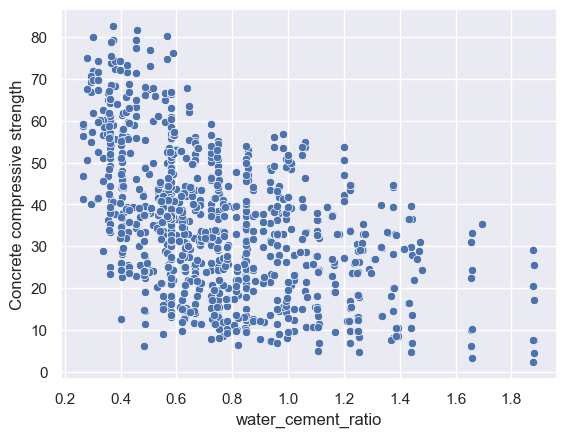

In [32]:
#plot water:cement ratio against compressive strength
sns.scatterplot(x=X['water_cement_ratio'], y=y)
plt.show()

In [33]:
#generate OLS regression results with water : cement ratio
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
print(model.fit().summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.618
Model:                                       OLS   Adj. R-squared:                  0.615
Method:                            Least Squares   F-statistic:                     183.6
Date:                           Fri, 13 Jun 2025   Prob (F-statistic):          2.28e-206
Time:                                   19:51:50   Log-Likelihood:                -3865.2
No. Observations:                           1030   AIC:                             7750.
Df Residuals:                               1020   BIC:                             7800.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [34]:
#generate OLS summary with only water : cement ratio
X_sm = sm.add_constant(X['water_cement_ratio'])
model = sm.OLS(y,X_sm)
print(model.fit().summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.251
Model:                                       OLS   Adj. R-squared:                  0.250
Method:                            Least Squares   F-statistic:                     343.9
Date:                           Fri, 13 Jun 2025   Prob (F-statistic):           1.86e-66
Time:                                   19:51:53   Log-Likelihood:                -4212.6
No. Observations:                           1030   AIC:                             8429.
Df Residuals:                               1028   BIC:                             8439.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

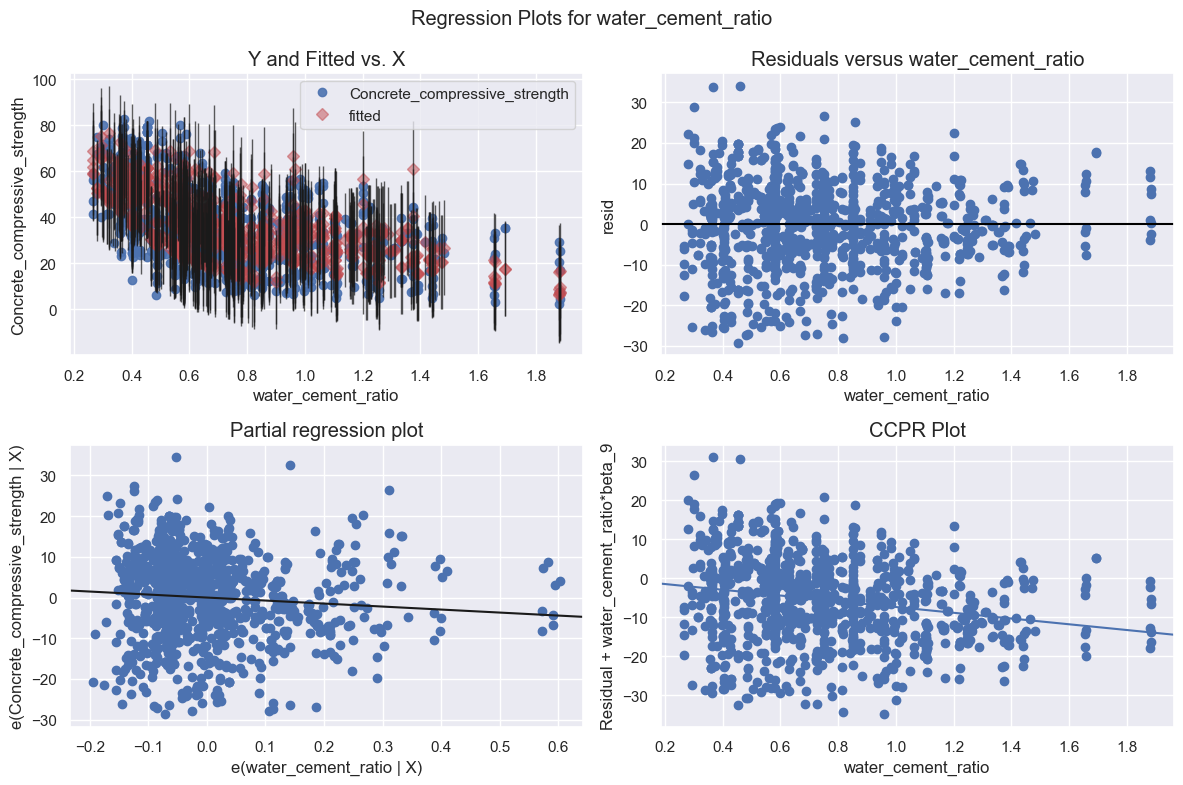

In [36]:
#copy water : cement ratio into concrete data
concrete_data['water_cement_ratio'] = X['water_cement_ratio']

#fit multiple linear regression model with water : cement ratio
model = ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age+ water_cement_ratio', data=concrete_data).fit()

#plot regression plots for water : cement ratio
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'water_cement_ratio', fig=fig)
fig.show()

Water : cement ratio residuals exhibits a near linear relationship.

### **7.**  **Preparing Data for ML**

In [37]:
#import ML preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [38]:
#column names
feature_names = X.columns

#train/test split 75% training, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

#numerical pipeline
scaler=MinMaxScaler()

#apply scaler to numerical data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **8.** **ML Baselines**

In [ ]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.0 MB/s eta 0:00:30
   ---------------------------------------- 1.8/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.1/150.0 MB 2.8 MB/s eta 0:00:53
    --------------------------------------- 3.1/150.0 MB 3.4 MB/s eta 0:00:44
   - -------------------------------------- 4.5/150.0 MB 3.8 MB/s eta 0:00:38
   - -------------------------------------- 5.5/150.0 MB 4.0 MB/s eta 0:00:37
   - -------------------------------------- 6.3/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 7.9/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 8.9/150.0 MB 4.5 MB/s eta 0:00:32
   -- ------------------------------------- 9.4/150.0 MB 4.4 MB/s eta 0:00:32



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##### **Machine Learning Model Selection**

##### **Preparing Our Modeling Toolkit**
We'll evaluate multiple regression algorithms to predict concrete strength

In [39]:
#import ML packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [40]:
from xgboost import XGBRegressor

# If you encounter ModuleNotFoundError for xgboost, you need to install it first.
# In Jupyter, you can install it using the following command:
!pip install xgboost

# After installation, you can import XGBRegressor as follows:

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
#LinearRegression mean cross-validation
lm = LinearRegression()
lm.fit(X_train, y_train)
cv = cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('LinearRegression')
print(mean(cv), '+/-', std(cv))

LinearRegression
-8.070279403274492 +/- 0.9042563541306484


In [42]:
#RandomForestRegressor mean cross-validation
rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('RandomForestRegressor')
print(mean(cv), '+/-', std(cv))

RandomForestRegressor
-3.741303784820554 +/- 0.1746349225638862


In [43]:
#GradientBoostingRegressor mean cross-validation
gbr = GradientBoostingRegressor(random_state = 1)
cv = cross_val_score(gbr,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('GradientBoostingRegressor')
print(mean(cv), '+/-', std(cv))

GradientBoostingRegressor
-3.8930976574254514 +/- 0.14455688824589297


In [44]:
#XGBoost mean cross-validation
xgb = XGBRegressor(random_state = 1)
cv = cross_val_score(xgb,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('XGBoost')
print(mean(cv), '+/-', std(cv))

XGBoost
-3.204958500031502 +/- 0.26753285934522414


### **9.** **Hyperparameter Tuning**

In [45]:
#ml algorithm tuner
from sklearn.model_selection import GridSearchCV

#performance reporting function
def clf_performance(regressor, model_name):
    print(model_name)
    print('Best Score: {} +/- {}'.format(str(regressor.best_score_),str(regressor.cv_results_['std_test_score'][regressor.best_index_])))
    print('Best Parameters: ' + str(regressor.best_params_))
    

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lm', LinearRegression())
])

param_grid = {
    'lm__fit_intercept': [True, False],
    'lm__copy_X': [True, False],
    'lm__positive': [True, False]
}

clf_lm = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
best_clf_lm = clf_lm.fit(X_train, y_train)
clf_performance(best_clf_lm, 'LinearRegressor')


LinearRegressor
Best Score: -8.070279403274489 +/- 0.9042563541306483
Best Parameters: {'lm__copy_X': True, 'lm__fit_intercept': True, 'lm__positive': False}


In [47]:
#RanddomForestRegressor GridSearchCV
rf = RandomForestRegressor(random_state = 1)
param_grid = {
                'n_estimators': np.arange(160,200,2) , 
                'bootstrap': [True,False],
#                 'max_depth': [20,30,40],
#                 'max_features': ['auto','sqrt','log2'],
#                  'min_samples_leaf': [2],
#                  'min_samples_split': [6,8,10]
            }
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'RandomForestRegressor')

RandomForestRegressor
Best Score: -3.752174984879036 +/- 0.16962584492518898
Best Parameters: {'bootstrap': True, 'n_estimators': np.int64(192)}


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

gbr = GradientBoostingRegressor(random_state=1)
param_grid = {
    'n_estimators': [160], 
    'max_depth': [4],
    'max_features': ['sqrt'],  # <-- FIXED
    'learning_rate': np.arange(.1,1,.1),
    'alpha': [0.0001],
    'min_samples_leaf': [2],
    'min_samples_split': np.arange(2,6,1)
}

clf_gbr = GridSearchCV(gbr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
best_clf_gbr = clf_gbr.fit(X_train, y_train)

clf_performance(best_clf_gbr, 'GradientBoostingRegressor')


GradientBoostingRegressor
Best Score: -3.194996207161107 +/- 0.17851182487229725
Best Parameters: {'alpha': 0.0001, 'learning_rate': np.float64(0.2), 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': np.int64(5), 'n_estimators': 160}


In [49]:
#XGBoost GridSearchCV
xgb = XGBRegressor(random_state = 1)
param_grid = {
#               'nthread':[4],
#               'objective':['reg:linear'],
#               'learning_rate': [0.3],
              'max_depth': [4],
#               'min_child_weight': [1],
#               'subsample': [1],
#               'colsample_bytree': np.arange(0.5,1,0.1),
              'n_estimators': [500]
              }
clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGBoost')

XGBoost
Best Score: -3.060463101501369 +/- 0.26839577688492133
Best Parameters: {'max_depth': 4, 'n_estimators': 500}


### **10.** **Assessing Models**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

gbr = GradientBoostingRegressor(
    alpha=0.0001,
    learning_rate=0.2,
    max_depth=4,
    max_features=None,  # <-- fixed
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=160,
    random_state=1
)

gbr.fit(X_train, y_train)
tpred_gbr = gbr.predict(X_test)

print('GradientBoostingRegressor')
print('MSE:', mean_squared_error(y_test, tpred_gbr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, tpred_gbr)))
print('MAE:', mean_absolute_error(y_test, tpred_gbr))
print('R-squared:', r2_score(y_test, tpred_gbr))


GradientBoostingRegressor
MSE: 19.928264399385675
RMSE: 4.464108466355368
MAE: 3.0586929775691822
R-squared: 0.9252890876328432


In [51]:
#XGBoost metrics
xgb = XGBRegressor(max_depth=4,
                   n_estimators=500,
                   random_state = 1)
xgb.fit(X_train,y_train)
tpred_xgb=xgb.predict(X_test)
print('XGBoost')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_xgb)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_xgb))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_xgb)))
print('R-squared: {}'.format(r2_score(y_test,tpred_xgb)))

XGBoost
MSE: 19.684504949748604
RMSE: 4.436722320559244
MAE: 2.9896385412622792
R-squared: 0.9262029399641614


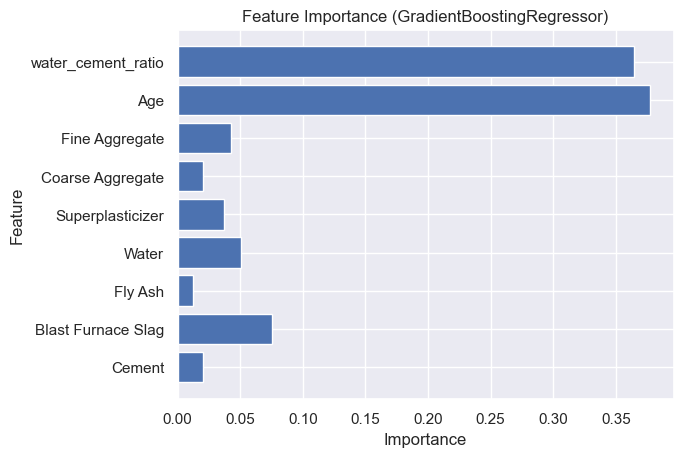

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
    # Feature importance for GradientBoostingRegressor
feature_importances = gbr.feature_importances_
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (GradientBoostingRegressor)')
plt.show()

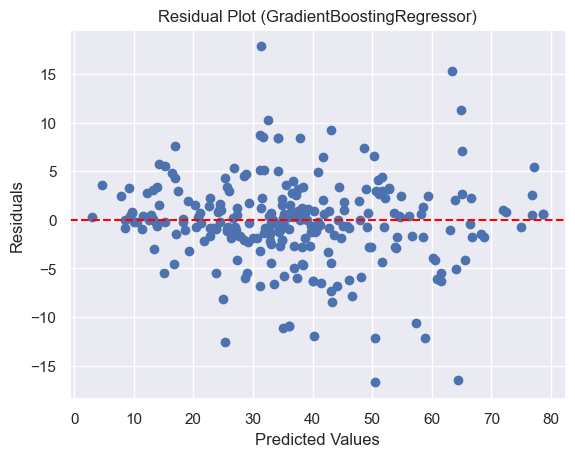

In [53]:
### 3. **Residual Analysis**

residuals = y_test - tpred_gbr
plt.scatter(tpred_gbr, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (GradientBoostingRegressor)')
plt.show()

### **11.** **Feature Importance**

In [54]:
#import packages for explaining feature importance
import eli5
from eli5.sklearn import PermutationImportance

In [55]:
#permutation importance from xgboost
perm = PermutationImportance(xgb).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = list(feature_names), top=len(feature_names))

### **12.** **Saving my Trained Model**

In [ ]:
# Save model and scaler 
import joblib
joblib.dump(xgb, 'concrete_strength_xgb.pkl')  # Save XGBoost model
joblib.dump(scaler, 'scaler.pkl')              # Save the scaler

['scaler.pkl']

### **13.** **Load New Data**

I'll validate our trained model on new synthetic mixes to evaluate its real-world readiness.

🆕 New Synthetic Data Samples (First 5):


Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   281.1                 4.1     73.4  192.5               1.8   
1   482.8               194.0     16.7  161.9               7.4   
2   406.2               166.5     35.1  154.6               0.5   
3   359.5                42.5     44.0  216.4              13.6   
4   204.6                36.4     54.7  217.6               3.9   

   Coarse Aggregate  Fine Aggregate  Age  water_cement_ratio  
0            1090.9           716.6  180               0.685  
1            1032.5           681.4    1               0.335  
2            1081.8           848.6   14               0.381  
3            1068.4           707.0  180               0.602  
4             979.4           684.3  180               1.064


✅ Model and scaler loaded successfully!

🔍 Prediction Analysis:
Average Predicted Strength: 37.08 MPa
Range: 13.06-61.18 MPa

📊 Final Predictions with Flags:


Cement  Water  Age  Predicted_Strength_MPa Strength_Flag
0   281.1  192.5  180               43.439999          ✅ OK
1   482.8  161.9    1               27.200001          ✅ OK
2   406.2  154.6   14               42.529999          ✅ OK
3   359.5  216.4  180               45.500000          ✅ OK
4   204.6  217.6  180               38.430000          ✅ OK
5   204.6  206.6   90               32.400002          ✅ OK
6   170.3  171.3    7               19.400000     ❌ Too Low
7   453.2  156.8    7               47.709999          ✅ OK
8   360.4  197.9    1               13.060000     ❌ Too Low
9   397.8  180.8  180               61.180000          ✅ OK

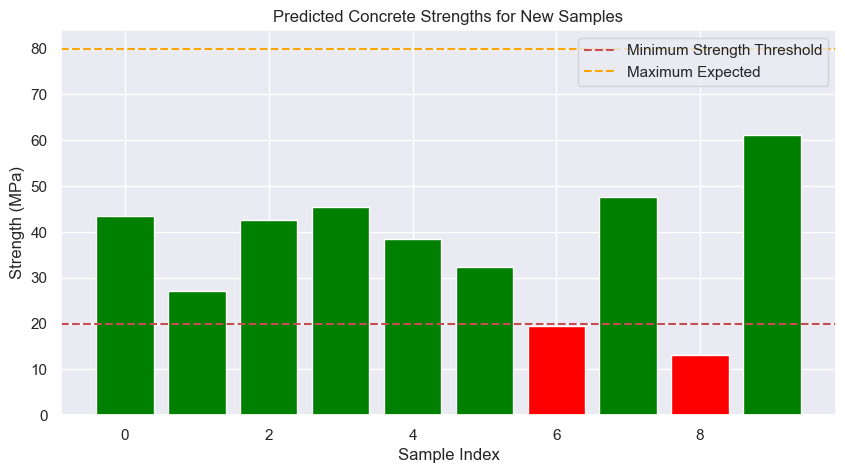

In [ ]:
# ======================
# NEW DATA VALIDATION
# ======================

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# 1. Generate Synthetic New Data (10 samples)
np.random.seed(42)  # For reproducibility
new_data = pd.DataFrame({
    'Cement': np.random.uniform(150, 500, 10).round(1),
    'Blast Furnace Slag': np.random.uniform(0, 200, 10).round(1),
    'Fly Ash': np.random.uniform(0, 120, 10).round(1),
    'Water': np.random.uniform(150, 220, 10).round(1),
    'Superplasticizer': np.random.uniform(0, 15, 10).round(1),
    'Coarse Aggregate': np.random.uniform(800, 1100, 10).round(1),
    'Fine Aggregate': np.random.uniform(600, 900, 10).round(1),
    'Age': np.random.choice([1, 3, 7, 14, 28, 56, 90, 180], 10)
})

# Add water-cement ratio
new_data['water_cement_ratio'] = (new_data['Water'] / new_data['Cement']).round(3)

print("🆕 New Synthetic Data Samples (First 5):")
display(new_data.head())

# 2. Load Original Model and Scaler
try:
    model = joblib.load('concrete_strength_xgb.pkl')
    scaler = joblib.load('scaler.pkl')
    print("\n✅ Model and scaler loaded successfully!")
except:
    print("\n❌ Error: Couldn't load model/scaler. Run model training first!")
    
# 3. Preprocess New Data (using original scaler)
feature_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 
                'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 
                'Age', 'water_cement_ratio']

X_new = new_data[feature_names]
X_new_scaled = scaler.transform(X_new)

# 4. Make Predictions
new_data['Predicted_Strength_MPa'] = model.predict(X_new_scaled).round(2)

# 5. Analyze Results
print("\n🔍 Prediction Analysis:")
print(f"Average Predicted Strength: {new_data['Predicted_Strength_MPa'].mean():.2f} MPa")
print(f"Range: {new_data['Predicted_Strength_MPa'].min():.2f}-{new_data['Predicted_Strength_MPa'].max():.2f} MPa")

# 6. Flag Potential Issues
new_data['Strength_Flag'] = np.where(
    new_data['Predicted_Strength_MPa'] < 20, 
    "❌ Too Low", 
    np.where(
        new_data['Predicted_Strength_MPa'] > 80,
        "⚠️ Unusually High",
        "✅ OK"
    )
)

print("\n📊 Final Predictions with Flags:")
display(new_data[['Cement', 'Water', 'Age', 'Predicted_Strength_MPa', 'Strength_Flag']])

# 7. Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(len(new_data)), new_data['Predicted_Strength_MPa'], 
        color=['red' if x < 20 else 'orange' if x > 80 else 'green' for x in new_data['Predicted_Strength_MPa']])
plt.axhline(y=20, color='r', linestyle='--', label='Minimum Strength Threshold')
plt.axhline(y=80, color='orange', linestyle='--', label='Maximum Expected')
plt.title('Predicted Concrete Strengths for New Samples')
plt.ylabel('Strength (MPa)')
plt.xlabel('Sample Index')
plt.legend()
plt.show()

#### **Improved Data Generation**

🆕 New Synthetic Data Samples (First 5):


Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   324.9                 3.1     61.2  178.2               1.5   
1   440.1               145.5     13.9  165.1               5.9   
2   396.4               124.9     29.2  162.0               0.4   
3   369.7                31.9     36.6  188.5              10.9   
4   281.2                27.3     45.6  189.0               3.1   

   Coarse Aggregate  Fine Aggregate  Age  water_cement_ratio  
0            1045.4           708.3    7               0.548  
1            1016.3           690.7   28               0.375  
2            1040.9           774.3   28               0.409  
3            1034.2           703.5   28               0.510  
4             989.7           692.1    7               0.600


✅ Model and scaler loaded successfully!

🔍 Prediction Analysis:
Average Predicted Strength: 45.21 MPa
Range: 22.71-61.67 MPa

📊 Final Predictions with Flags:


Cement  Water  Age  Predicted_Strength_MPa Strength_Flag
0   324.9  178.2    7               25.969999          ✅ OK
1   440.1  165.1   28               61.669998          ✅ OK
2   396.4  162.0   28               60.220001          ✅ OK
3   369.7  188.5   28               39.430000          ✅ OK
4   281.2  189.0    7               22.709999          ✅ OK
5   281.2  184.3   28               35.290001          ✅ OK
6   261.6  169.1   28               47.360001          ✅ OK
7   423.2  162.9    7               47.639999          ✅ OK
8   370.2  180.5   28               50.470001          ✅ OK
9   391.6  173.2   56               61.290001          ✅ OK

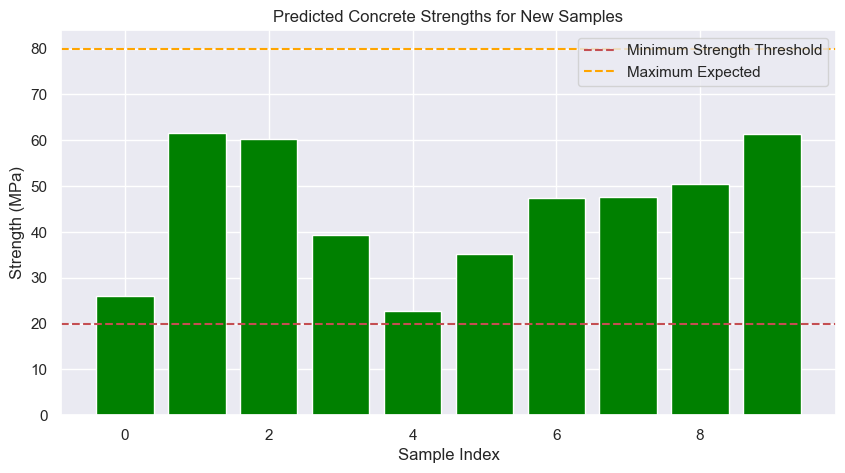

In [68]:
# ======================
# NEW DATA VALIDATION
# ======================

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# 1. Generate Synthetic New Data (10 samples) - IMPROVED VERSION
np.random.seed(42)
new_data = pd.DataFrame({
    'Cement': np.random.uniform(250, 450, 10).round(1),
    'Blast Furnace Slag': np.random.uniform(0, 150, 10).round(1),
    'Fly Ash': np.random.uniform(0, 100, 10).round(1),
    'Water': np.random.uniform(160, 190, 10).round(1),
    'Superplasticizer': np.random.uniform(0, 12, 10).round(1),
    'Coarse Aggregate': np.random.uniform(900, 1050, 10).round(1),
    'Fine Aggregate': np.random.uniform(650, 800, 10).round(1),
    'Age': np.random.choice([7, 14, 28, 28, 56, 90], 10)
})
# Enforce realistic water-cement ratio
new_data['water_cement_ratio'] = (new_data['Water'] / new_data['Cement']).round(3)
new_data['water_cement_ratio'] = np.minimum(new_data['water_cement_ratio'], 0.6)

print("🆕 New Synthetic Data Samples (First 5):")
display(new_data.head())

# 2. Load Original Model and Scaler
try:
    model = joblib.load('concrete_strength_xgb.pkl')
    scaler = joblib.load('scaler.pkl')
    print("\n✅ Model and scaler loaded successfully!")
except:
    print("\n❌ Error: Couldn't load model/scaler. Run model training first!")
    
# 3. Preprocess New Data (using original scaler)
feature_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 
                'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 
                'Age', 'water_cement_ratio']

X_new = new_data[feature_names]
X_new_scaled = scaler.transform(X_new)

# 4. Make Predictions
new_data['Predicted_Strength_MPa'] = model.predict(X_new_scaled).round(2)

# 5. Analyze Results
print("\n🔍 Prediction Analysis:")
print(f"Average Predicted Strength: {new_data['Predicted_Strength_MPa'].mean():.2f} MPa")
print(f"Range: {new_data['Predicted_Strength_MPa'].min():.2f}-{new_data['Predicted_Strength_MPa'].max():.2f} MPa")

# 6. Flag Potential Issues
new_data['Strength_Flag'] = np.where(
    new_data['Predicted_Strength_MPa'] < 20, 
    "❌ Too Low", 
    np.where(
        new_data['Predicted_Strength_MPa'] > 80,
        "⚠️ Unusually High",
        "✅ OK"
    )
)

print("\n📊 Final Predictions with Flags:")
display(new_data[['Cement', 'Water', 'Age', 'Predicted_Strength_MPa', 'Strength_Flag']])

# 7. Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(len(new_data)), new_data['Predicted_Strength_MPa'], 
        color=['red' if x < 20 else 'orange' if x > 80 else 'green' for x in new_data['Predicted_Strength_MPa']])
plt.axhline(y=20, color='r', linestyle='--', label='Minimum Strength Threshold')
plt.axhline(y=80, color='orange', linestyle='--', label='Maximum Expected')
plt.title('Predicted Concrete Strengths for New Samples')
plt.ylabel('Strength (MPa)')
plt.xlabel('Sample Index')
plt.legend()
plt.show()

#### **Mix Validity Check**

In [69]:
# Add these checks after predictions
new_data['Mix_Validity'] = np.where(
    new_data['water_cement_ratio'] > 0.6,
    "⚠️ Invalid: High W/C Ratio",
    np.where(
        new_data['Cement'] < 250,
        "⚠️ Invalid: Low Cement",
        "Valid"
    )
)

#### **Strength vs. Curing Time Analysis**

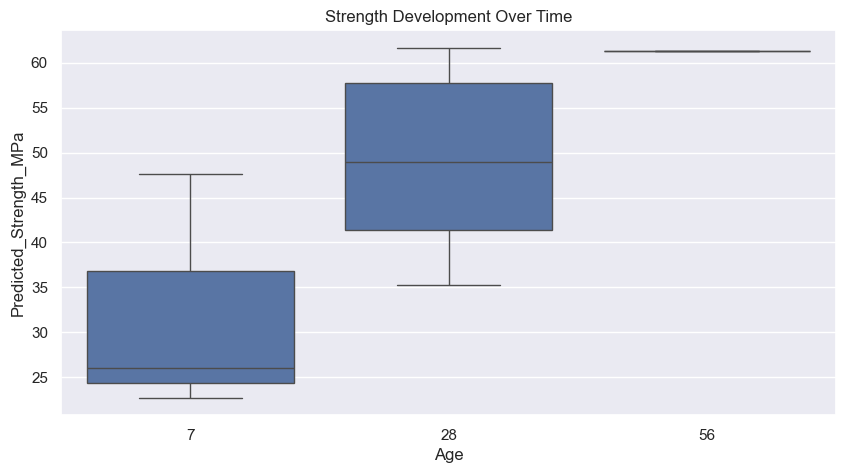

In [70]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age', y='Predicted_Strength_MPa', data=new_data)
plt.title("Strength Development Over Time")
plt.show()

In [73]:
import joblib

# Save all necessary objects
joblib.dump({
    'model': xgb,  # Your trained model
    'scaler': scaler,
    'feature_names': feature_names,  # List of column names
    'wcr_threshold': 0.6  # Water-cement ratio limit
}, 'concrete_strength_pipeline.pkl')

['concrete_strength_pipeline.pkl']

### **14** **Concrete Strength Prediction Template**

In [ ]:
import joblib
import pandas as pd
import numpy as np

# 1. Load Pipeline
pipeline = joblib.load('concrete_strength_pipeline.pkl')

# 2. Input New Data - ALL REQUIRED FEATURES
new_mix = pd.DataFrame([{
    'Cement': 350,
    'Blast Furnace Slag': 50,
    'Fly Ash': 0,                    # Added missing feature
    'Water': 180,
    'Superplasticizer': 5.5,         # Added missing feature
    'Coarse Aggregate': 950,         # Added missing feature
    'Fine Aggregate': 750,           # Added missing feature
    'Age': 28                        # Added missing feature
}])

# 3. Predict
def predict_strength(new_data):
    # Add water-cement ratio
    new_data['water_cement_ratio'] = new_data['Water'] / new_data['Cement']
    
    # Ensure all features exist (fill missing with 0 if needed)
    for feature in pipeline['feature_names']:
        if feature not in new_data:
            new_data[feature] = 0  # Or use np.nan and impute
    
    # Select and scale features IN CORRECT ORDER
    X = pipeline['scaler'].transform(new_data[pipeline['feature_names']])
    
    # Predict & validate
    pred = pipeline['model'].predict(X)[0]
    if new_data['water_cement_ratio'].iloc[0] > pipeline['wcr_threshold']:
        print(f"⚠️ Warning: High water-cement ratio ({new_data['water_cement_ratio'].iloc[0]:.2f})")
    return pred

print(f"Predicted Strength: {predict_strength(new_mix):.1f} MPa")

Predicted Strength: 45.9 MPa
